In [1]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [61]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [120]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregated.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan', 'Czechia']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
Processed 77 lines.
From:  2020-01-22 To 2020-04-06


In [121]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 76
 Poland 76
  Italy 76
     US 76
Germany 76
  Spain 76
 France 76
  Japan 76
Czechia 76


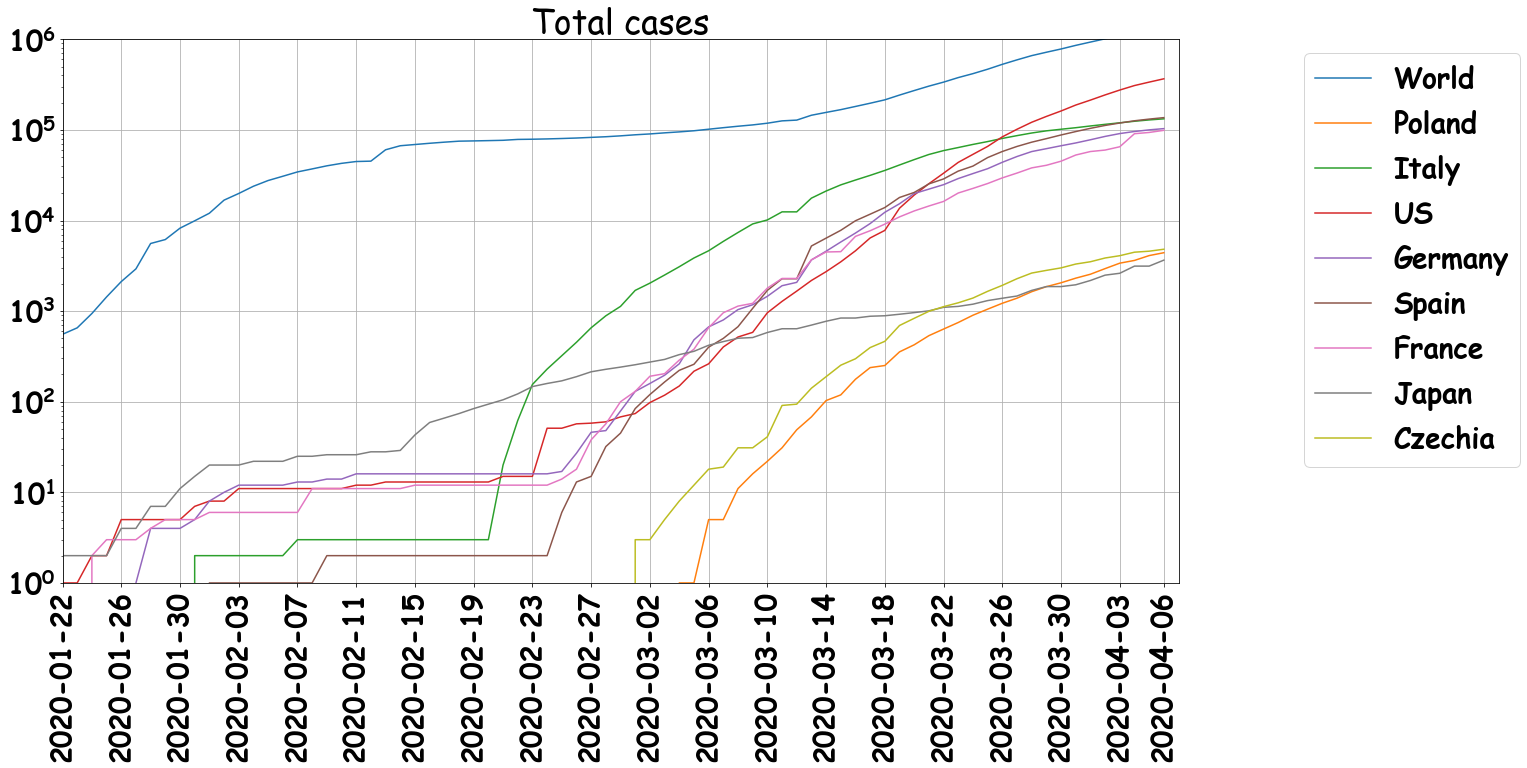

In [122]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e6)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

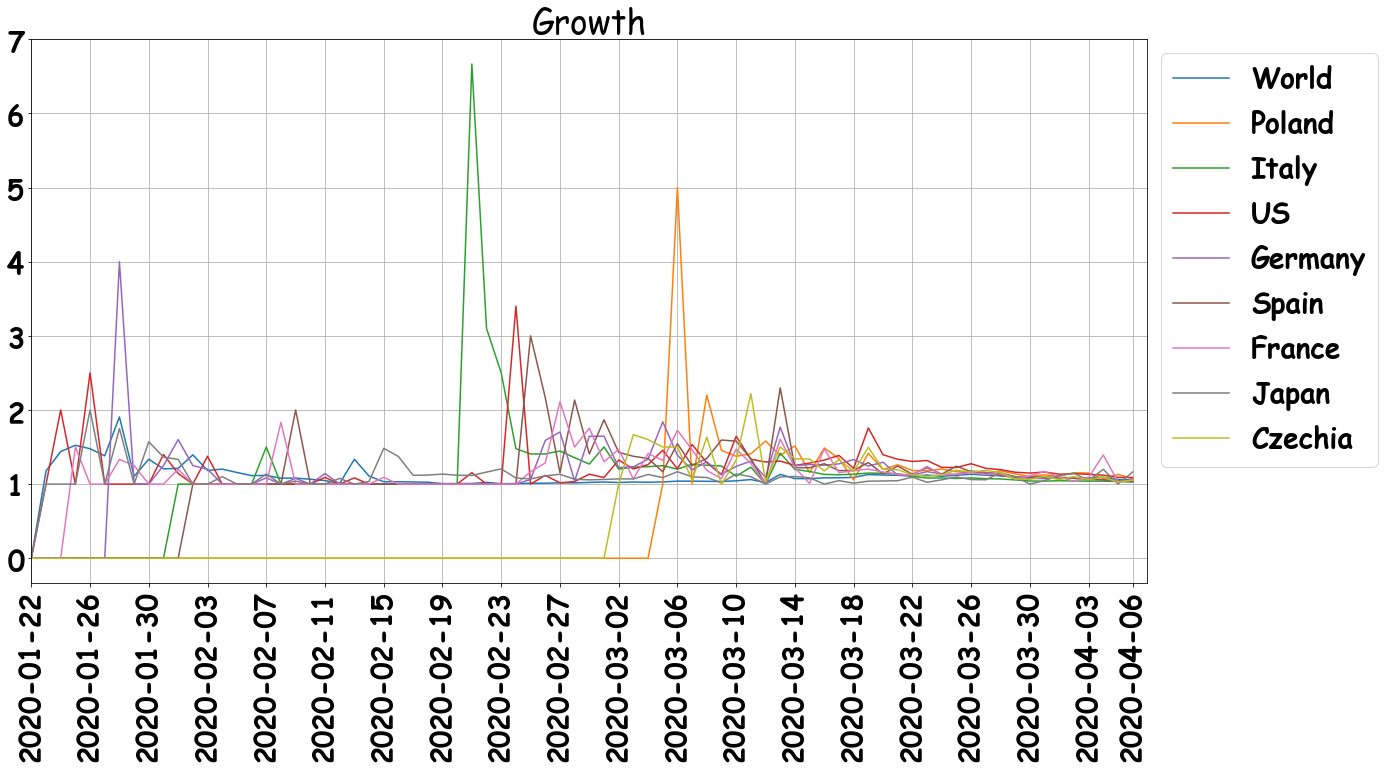

In [123]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(0, clist[0].idx[-1]+1)
# plt.yscale('log')
# plt.ylim(1,1e6)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 4
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

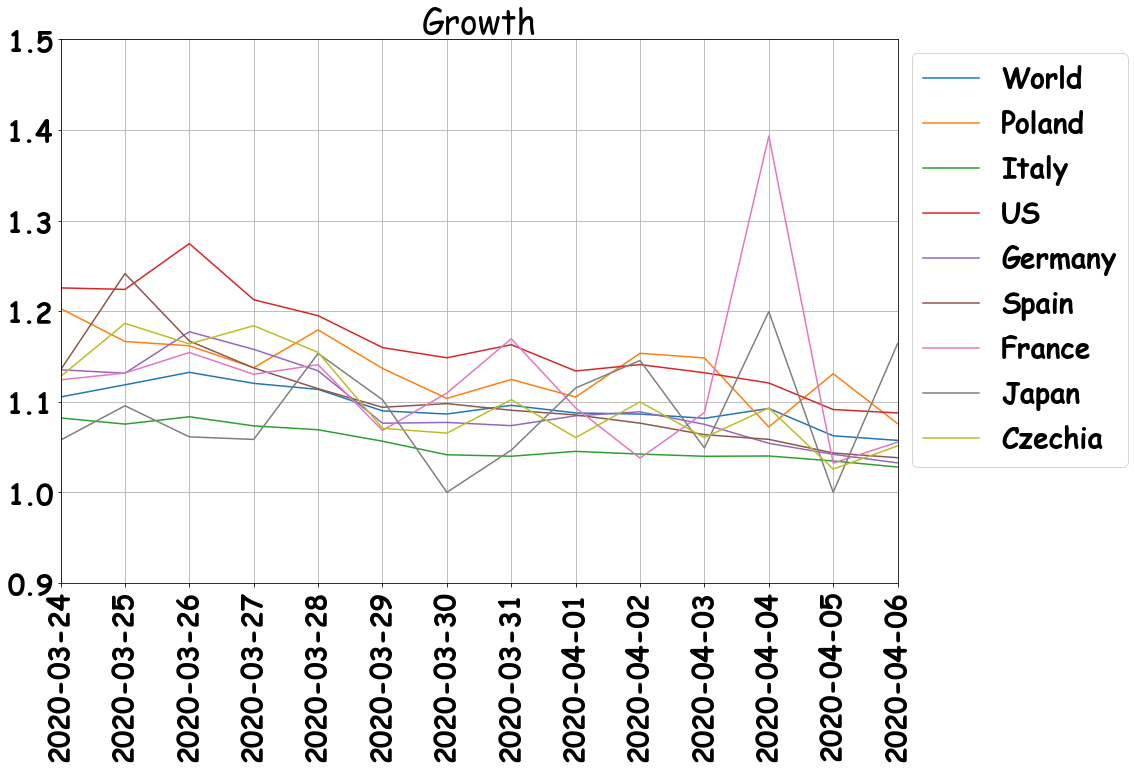

In [124]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-14], clist[0].idx[-1])
plt.ylim(0.9,1.5)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

#### Growth averaged from first detected case

In [125]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), av)

  World 1.117196472475623
 Poland 1.3666526872981815
  Italy 1.263518809975489
     US 1.218765034270127
Germany 1.214314633602159
  Spain 1.2392221396553882
 France 1.1784308802877492
  Japan 1.1149588553125194
Czechia 1.2486545787967167


#### Growth averaged for last 14 days

In [126]:
for d in clist:
    av = np.mean([x for x in d.gf[-14:] if x])
    print("{0:>7}".format(d.name), round(av,3))

  World 1.095
 Poland 1.136
  Italy 1.054
     US 1.165
Germany 1.096
  Spain 1.103
 France 1.123
  Japan 1.089
Czechia 1.103


#### Growth last day:

In [127]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>8}".format(d.con[-1]), "{0:>6}".format(d.con[-1]-d.con[-2]), round(d.gf[-1],3))

  World 2020-04-06  1345048  72933 1.057
 Poland 2020-04-06     4413    311 1.076
  Italy 2020-04-06   132547   3599 1.028
     US 2020-04-06   366614  29542 1.088
Germany 2020-04-06   103374   3251 1.032
  Spain 2020-04-06   136675   5029 1.038
 France 2020-04-06    98963   5190 1.055
  Japan 2020-04-06     3654    515 1.164
Czechia 2020-04-06     4822    235 1.051


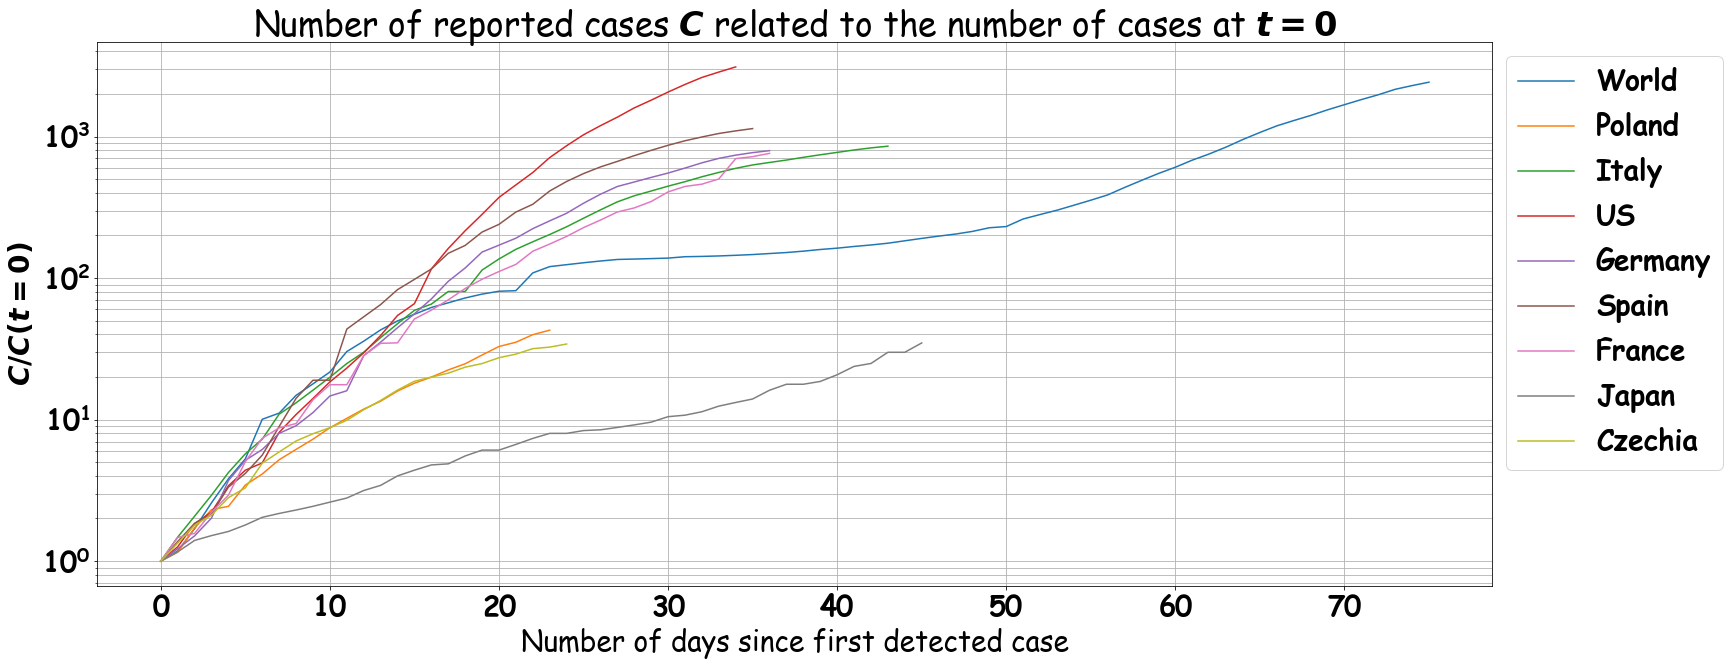

In [128]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [129]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)

6
11


In [130]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.13
    exp = round(exp)
    print(i, exp)

1 4987.0
2 5635.0
3 6368.0
4 7196.0
5 8131.0
6 9188.0
7 10382.0
8 11732.0
9 13257.0
10 14980.0
11 16927.0
12 19128.0
13 21615.0
14 24425.0
15 27600.0
16 31188.0
17 35242.0
18 39823.0
19 45000.0
20 50850.0
21 57460.0
22 64930.0
23 73371.0
24 82909.0
25 93687.0
26 105866.0
27 119629.0
28 135181.0
29 152755.0
